#  **Vidyuth Sridhar**
  
##  Data Science & Business Analytics Intern at The Sparkx Foundation 

## Task #3 of Data Science:  Exploratory Data Analysis - Retail 

Dataset: https://bit.ly/3i4rbWl

First , we will import all the necessary libraries 


*   NumPy: For supporting large, multidimentional arrays.
*   pandas: For data manipulation and analysis.
*   seaborn: For statistical data visualization
*   matplotlib: For plotting graphs

Also, we will read the given dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data set of "Marketing Analysis" in data.
data= pd.read_csv("/content/SampleSuperstore.csv")

# Printing the data
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Next, we will try to get a brief summary of the dataframe we have, that is, column types, sum of null values, column values, shape of dataframe, and number of unique values 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
data.shape

(9994, 13)

In [ ]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Exploratory Data Analysis**

- We will try to get a relationship between sales and the profit, using a kernel distribution estimation graph(kdeplot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


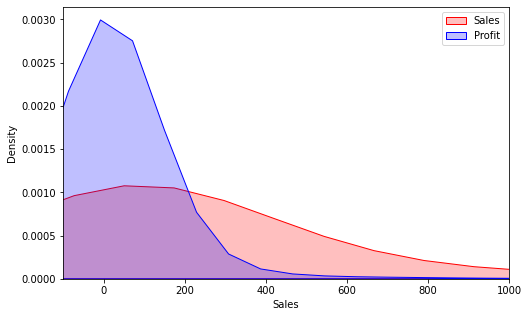

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data['Sales'],color='red',label='Sales',shade=True,bw=0.5)
sns.kdeplot(data['Profit'],color='Blue',label='Profit',shade=True,bw=0.5)
plt.xlim([-100,1000])
plt.legend()

Here, sales is higher than profit after some level, which should be taken into consideration.

**Heatmap**

A heatmap can be used to find the correlation between column elements

In [ ]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


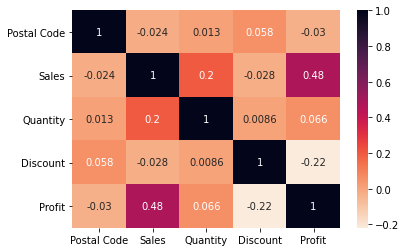

In [ ]:
sns.heatmap(data.corr(),cmap='rocket_r',annot=True)

From the heatmap, we can say that,


*   Sales and profit are moderately correlated.
*   Quantity and profir are moderately correlated.
*   Discount and profit are negatively correlated.






## **Count plot of each column**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

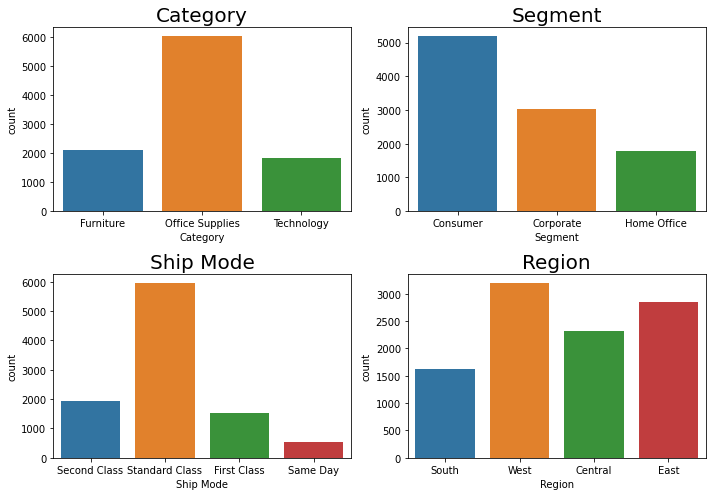

In [ ]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(data['Category'],ax=axs[0][0])
sns.countplot(data['Segment'],ax=axs[0][1])
sns.countplot(data['Ship Mode'],ax=axs[1][0])
sns.countplot(data['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sub-Category')

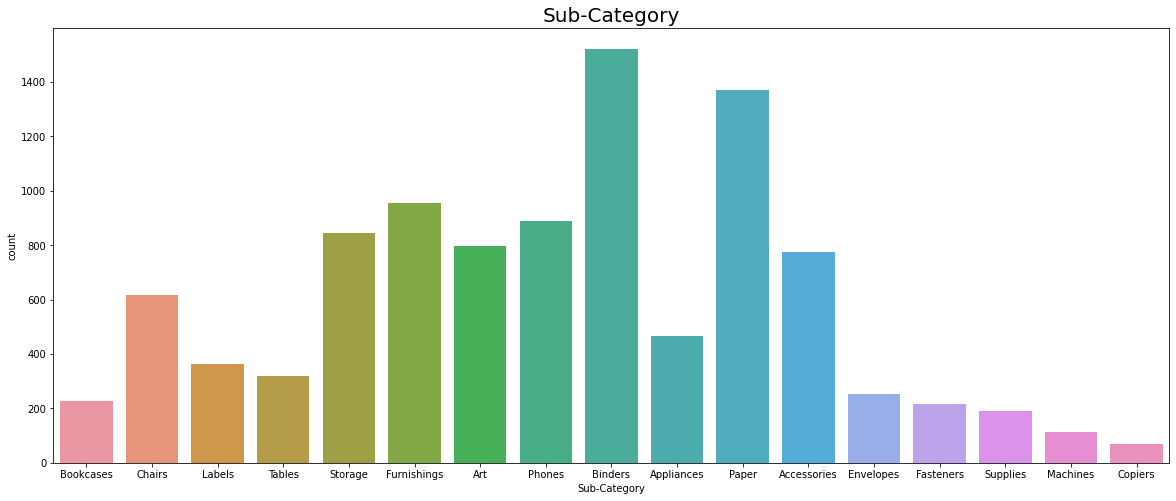

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Category')

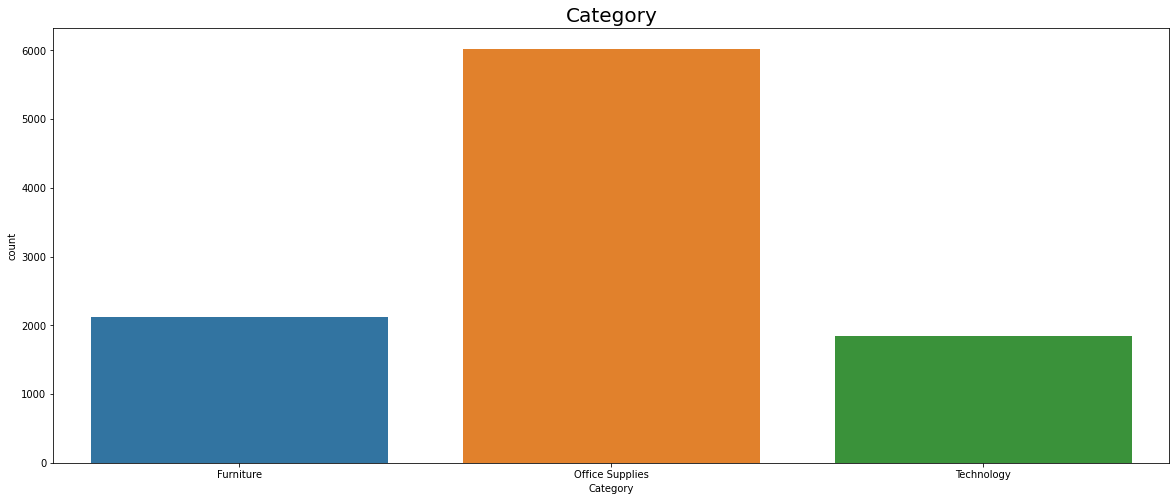

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data['Category'])
plt.title('Category',fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'State')

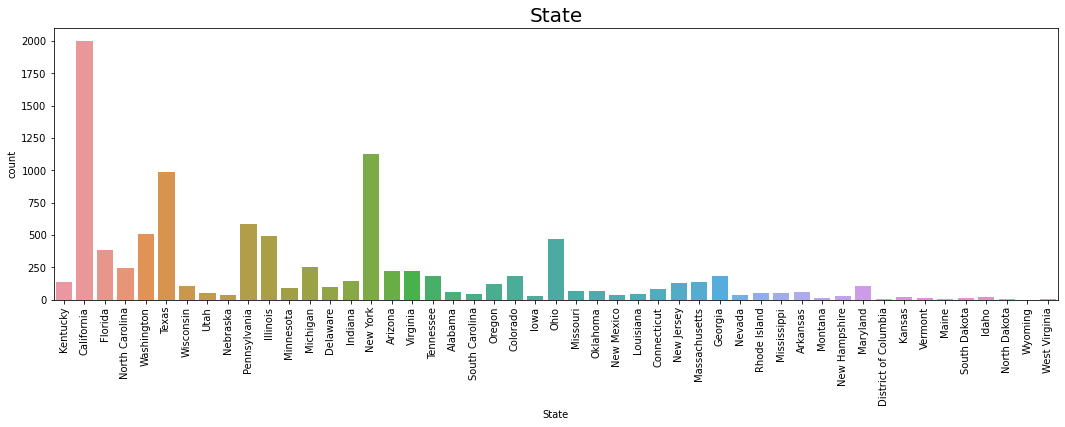

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(data['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Quantity')

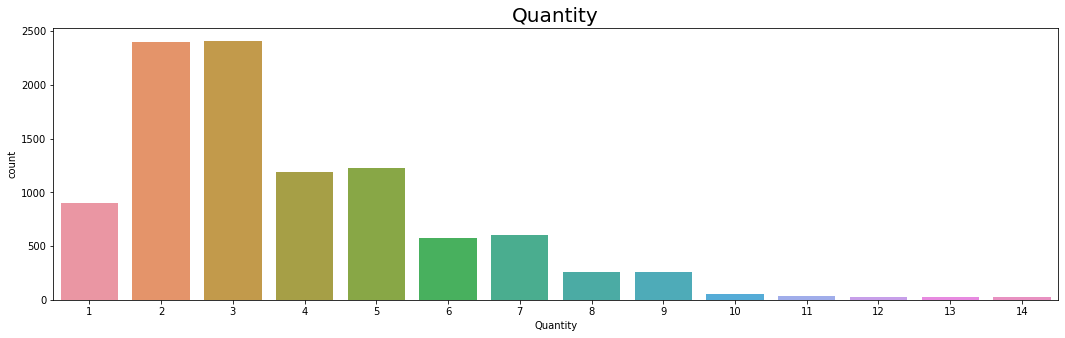

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(data['Quantity'])
plt.title('Quantity',fontsize=20)

## **Statewise Analysis of the deals**

In [ ]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [ ]:
df1 = data['State'].value_counts()
df1.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

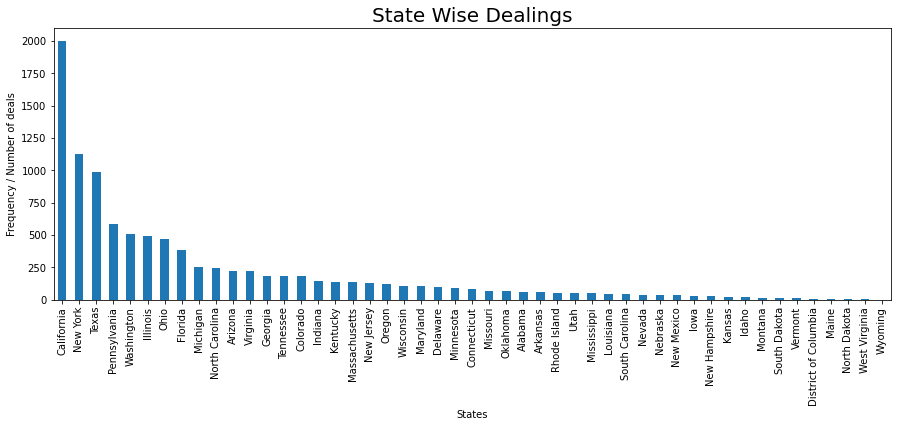

In [ ]:
df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings', fontsize = 20)
plt.show()

Here, the states with maximum number of deals are:



1.  California
2.  New York
3.  Texas
4.  Pennsylvania
5.  Washington








In [ ]:
data['State'].value_counts().mean()

203.9591836734694

Average number of deals per state is: 204

**City wise dealings**

In [ ]:
df2 = data['City'].value_counts()
df2=df2.head(50)

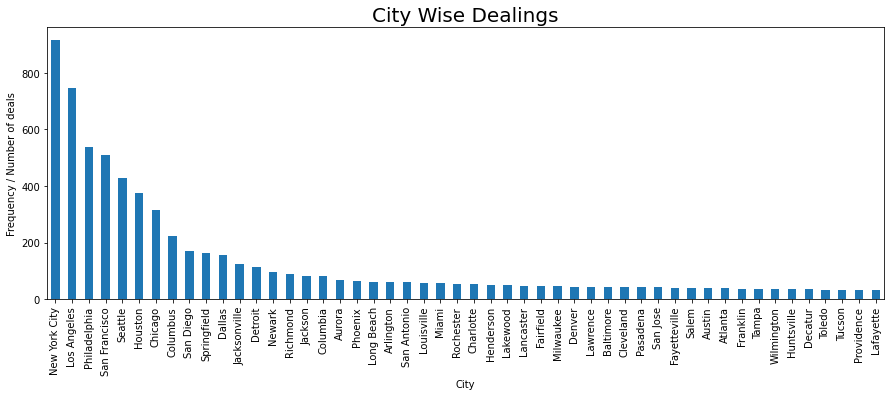

In [ ]:
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings', fontsize = 20)
plt.show()

Here, the cities with maximum number of deals are:

1.  New York City
2.  Los Angeles
3.  Philadelphia
4.  San Franciso
5.  Seattle

In [ ]:
data['City'].value_counts().mean()

18.821092278719398

Average deal per city: 18

**Profit, Sales and Discount analysis based on segments**

In [ ]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [ ]:
data_segment= data.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
data_segment


,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, profit')

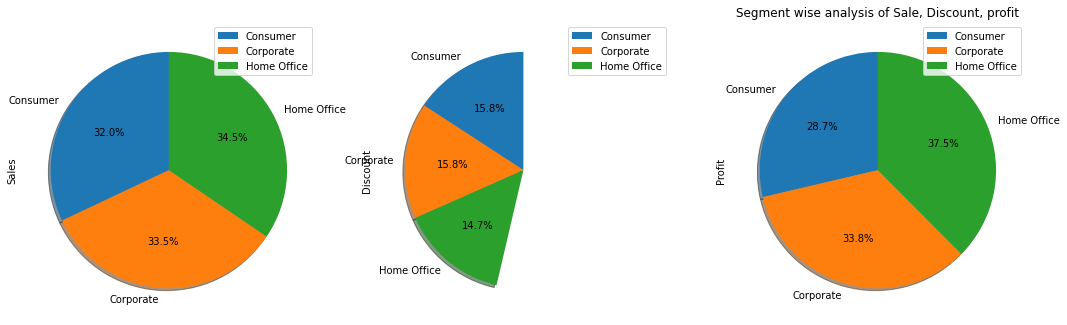

In [ ]:
#1. sales 2. Discount 3. Profit
data_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(18, 20),
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = data_segment.index)
plt.title('Segment wise analysis of Sale, Discount, profit')

Sales:

Consumer : 32%
Corporate - 33.5%
Home Office : 34.5%
Discount :

Consumer : 15.8%
Corporate : 15.8%
Home Office : 14.7%
Profit :

Consumer : 15.8%

Corporate : 15.8%

Home Office : 14.7%

**Statewise analysis of Profit Discount and sell**

In [ ]:
data['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [ ]:
data_state= data.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
data_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


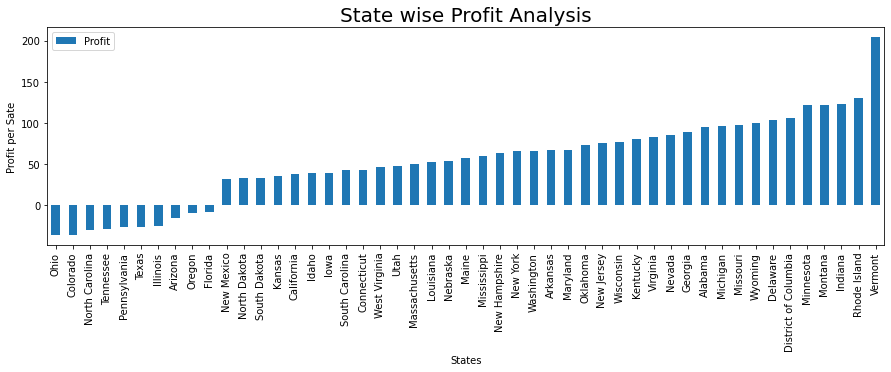

In [ ]:
data_state1=data_state.sort_values('Profit')

data_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

Text(0.5, 1.0, 'State wise analysis of Discount')

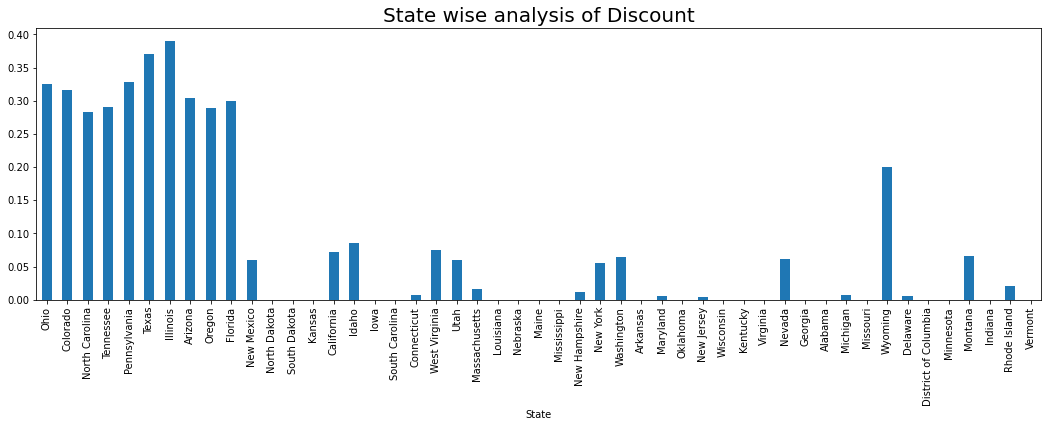

In [ ]:
data_state1['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise analysis of Discount', fontsize=20)

**City wise analysis of profit**

In [ ]:
data_city= data.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
data_city = data_city.sort_values('Profit')
data_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

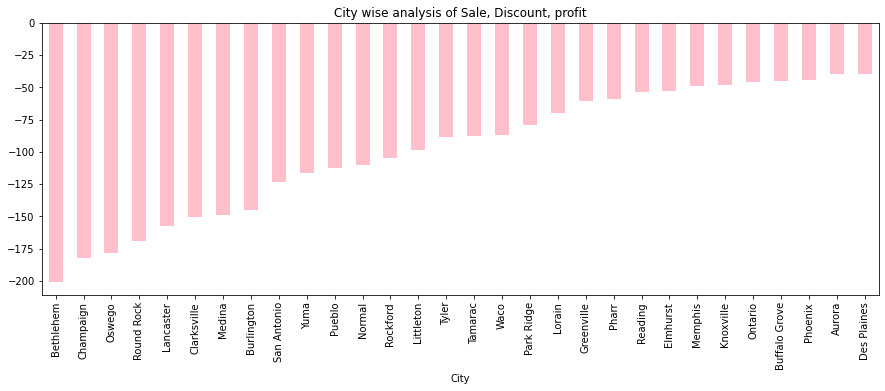

In [ ]:
#1.Low Profit
data_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit')

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

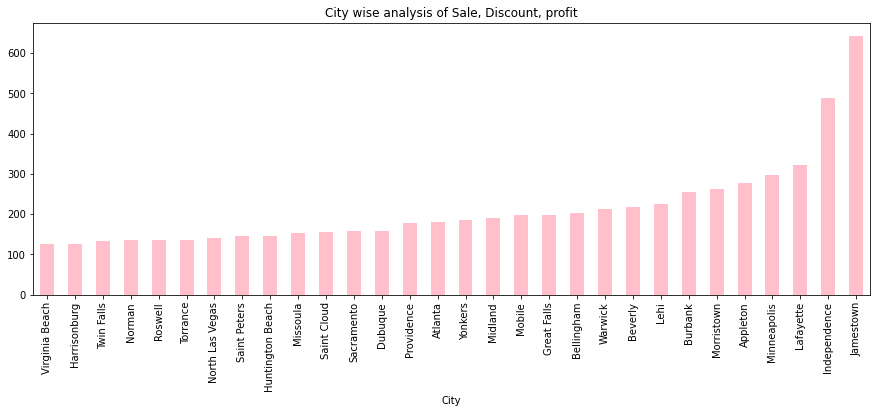

In [ ]:
#2. High Profit
data_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit')

**QUANTITY WISE SALES, PROFIT AND DISCOUNT ANALYSIS**

In [ ]:
data_quantity = data.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
data_quantity.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, profit')

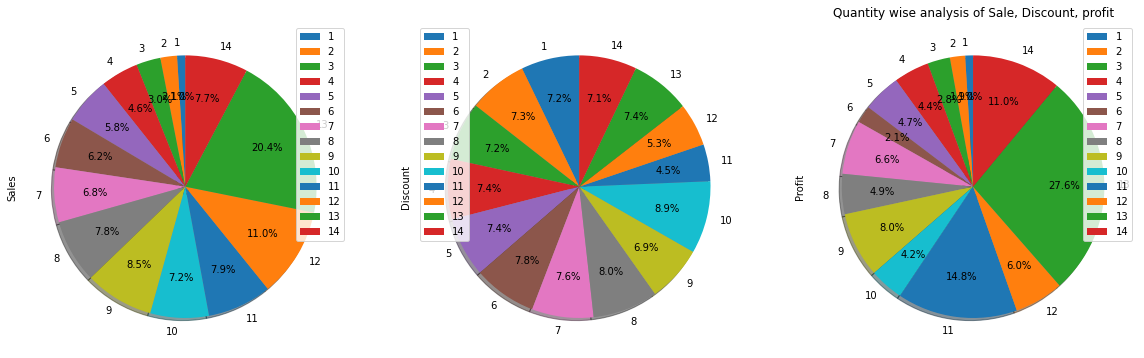

In [ ]:
#1. sales 2. Discount 3. Profit
data_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = data_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit')

**CATAGORY WISE SALES DISCOUNT AND PROFIT**

In [ ]:
data_category = data.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
data_category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26b7c6d510>,
      dtype=object)

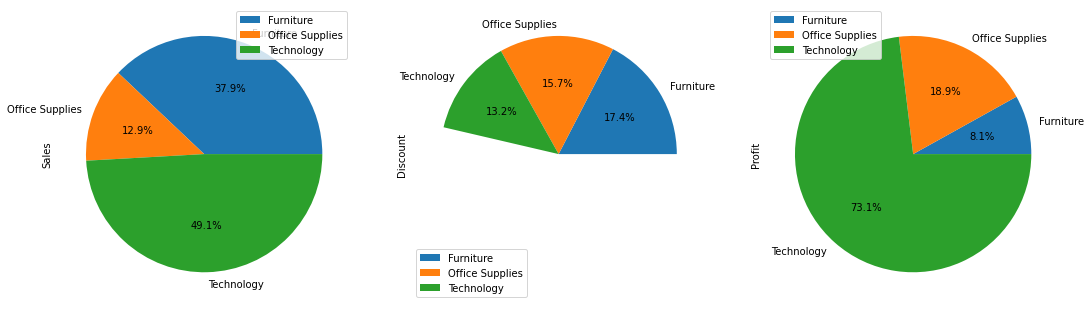

In [ ]:
data_category.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%', labels = data_category.index)



*   Maximun sales and Profit obtain in Technology.
*   Minimun profit obtain in Furniture



**REGION WISE ANALYSIS**

In [ ]:
data_region = data.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
data_region

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26b78923d0>,
      dtype=object)

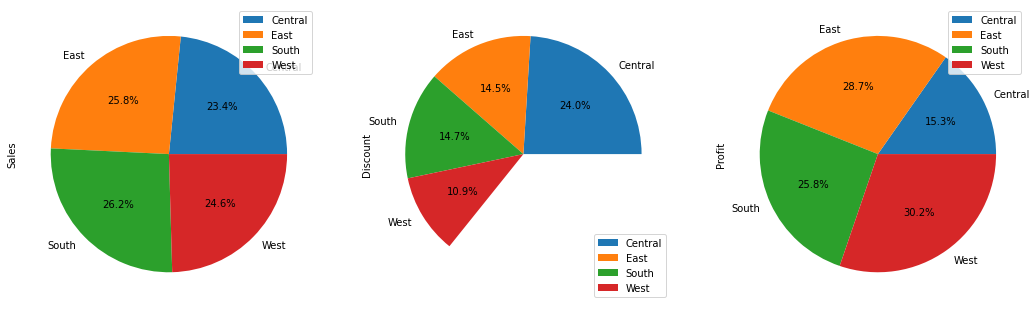

In [ ]:
data_region.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%',labels = data_region.index)

Profit is high in the west.

# **Colclusion**



*   Profit is higher than sales in some areas, which can be improved.
*   Profit and Discount is high at some places
*   Sub-category: Copier: High Profit & sales
*   Sub-category: Binders , Machines and then tables have high discount than others..
*   Category: Technology gives Maximun sales and Profit.
*   Category: Furniture gives Minimun profit
*   Here is top 3 city where deals are Highest:
      1.   New York City
      2.   Los Angeles 
      3.   Philadelphia   

*   Sales and Profit are Moderately Correlated.
*   Quantity and Profit are less Moderately Correlated.
*   Discount and Profit are Negatively Correlated
*   Here is top 3 state where deals are Highest:
      1.   Califonia
      2.   New York 
      3.   Texas

*   Wyoming : Lowest Number of deal,Highest amount of sales= Wyoming(11.8%)
*   Lowest amount of sales= South Dakota(0.8%).


















**Thank You**